# Data Understanding

## Imports

In [1]:
import pandas as pd
import plotly.express as ex
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 10,10
pd.options.display.max_columns = None


In [74]:
sitesDb = pd.read_csv("../Data/BI_mst_lq_Q.csv") # Sites
mainDb = pd.read_csv("../Data/mi_lqk_dq.csv") # 5 Million
chemDb = pd.read_csv("../Data/rx_param_4_lq_q.csv") # Chemicals

## Data cleaning.

### Joined location name and chemical name to mainDb and saved it as mainDbAll

In [15]:
mainDb['locationName'] = mainDb['idobj']
sitesDb['locationName'] = sitesDb['idsatz']
sitesDbCopy = sitesDb[['locationName','objnam']]
mainDbLocation = mainDb.merge(sitesDbCopy, on="locationName", how="left")
mainDbLocation['chemName'] = mainDbLocation['param']
chemDb['chemName'] = chemDb['idsatz']
chemDbCopy = chemDb[['chemName','objnam']]
mainDbAll = mainDbLocation.merge(chemDbCopy, on="chemName", how="left")
mainDbAll.drop(['locationName','chemName'], axis=1, inplace=True)
mainDbAll.rename(columns={'objnam_x':'locationName','objnam_y':'chemName'}, inplace=True)

In [114]:
sitesDb.columns

Index(['idsatz', 'idsrcobj', 'idsrccls', 'namowner', 'idprz', 'objkey',
       'objnam', 'objbez', 'objtyp', 'objbem', 'dtbeg', 'dtend', 'eucode',
       'geometry', 'klass', 'hoehe', 'gebietstyp', 'idcls'],
      dtype='object')

### mainDbAll sort by date  

In [11]:
mainDbAll.sort_values(by=['dtbeg'], inplace=True)

## Data Visualizing

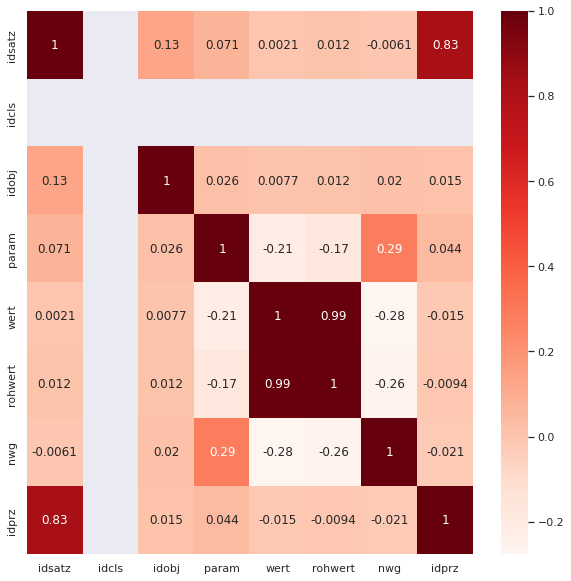

In [6]:
cor = mainDbAll.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

> No correlation between the parameters

### Splitting the data into 6 different dataframes as per the chemical name

In [6]:
sDbChem1 = mainDbAll[mainDbAll['chemName'] == 'Stickstoffmonoxid']
sDbChem2 = mainDbAll[mainDbAll['chemName'] == 'Stickstoffdioxid']
sDbChem3 = mainDbAll[mainDbAll['chemName'] == 'Schwefeldioxid']
sDbChem4 = mainDbAll[mainDbAll['chemName'] == 'PM2.5']
sDbChem5 = mainDbAll[mainDbAll['chemName'] == 'PM10']
sDbChem6 = mainDbAll[mainDbAll['chemName'] == 'Ozon']
verification = mainDbAll.shape[0] == sDbChem1.shape[0] + sDbChem2.shape[0] + sDbChem3.shape[0] + sDbChem4.shape[0] + sDbChem5.shape[0] + sDbChem6.shape[0]
print(f"If splitting of the data is done accurately: {verification}")

If splitting of the data is done accurately: True


### Creating average values for each location

In [10]:
sDbChem1Avg = sDbChem1.groupby(['locationName']).mean()
sDbChem1Avg = sDbChem1Avg.reset_index()
sDbChem2Avg = sDbChem2.groupby(['locationName']).mean()
sDbChem2Avg = sDbChem2Avg.reset_index()
sDbChem3Avg = sDbChem3.groupby(['locationName']).mean()
sDbChem3Avg = sDbChem3Avg.reset_index()
sDbChem4Avg = sDbChem4.groupby(['locationName']).mean()
sDbChem4Avg = sDbChem4Avg.reset_index()
sDbChem5Avg = sDbChem5.groupby(['locationName']).mean()
sDbChem5Avg = sDbChem5Avg.reset_index()
sDbChem6Avg = sDbChem6.groupby(['locationName']).mean()
sDbChem6Avg = sDbChem6Avg.reset_index()

### Plotting bar graph the data for each chemical in a single 

In [15]:
# Plotting the data and color coding the maximum value in red and minimum in green
fig1 = ex.bar(
    sDbChem1Avg,
    x='locationName',
    y='wert',
    title='Stickstoffmonoxid [nitric oxide]',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem1Avg['wert'] == sDbChem1Avg['wert'].max(),
)
fig2 = ex.bar(
    sDbChem2Avg,
    x='locationName',
    y='wert',
    title='Stickstoffdioxid [nitrogen dioxide]',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem2Avg['wert'] == sDbChem2Avg['wert'].max()
    )
fig3 = ex.bar(
    sDbChem3Avg,
    x='locationName',
    y='wert',
    title='Schwefeldioxid [sulfur dioxide]',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem3Avg['wert'] == sDbChem3Avg['wert'].max()
    )
fig4 = ex.bar(
    sDbChem4Avg,
    x='locationName',
    y='wert',
    title='PM2.5',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem4Avg['wert'] == sDbChem4Avg['wert'].max()
    )
fig5 = ex.bar(
    sDbChem5Avg,
    x='locationName',
    y='wert',
    title='PM10',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem5Avg['wert'] == sDbChem5Avg['wert'].max()
    )
fig6 = ex.bar(
    sDbChem6Avg,
    x='locationName',
    y='wert',
    title='Ozon',
    labels={'wert':'Average Value', 'locationName':'Location'},
    color=sDbChem6Avg['wert'] == sDbChem6Avg['wert'].max()
    )
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()

## Facts about data

In [21]:
print(f"The number of cities with Stickstoffmonoxid [nitric oxide]  data available is: {sDbChem1Avg.locationName.unique().shape[0]}")
print(f"The number of cities with Stickstoffdioxid [nitrogen dioxide] data available is: {sDbChem2Avg.locationName.unique().shape[0]}")
print(f"The number of cities with Schwefeldioxid [sulfur dioxide] data available is: {sDbChem3Avg.locationName.unique().shape[0]}")
print(f"The number of cities with PM2.5 data available is: {sDbChem4Avg.locationName.unique().shape[0]}")
print(f"The number of cities with PM10 data available is: {sDbChem5Avg.locationName.unique().shape[0]}")
print(f"The number of cities with Ozon data available is: {sDbChem6Avg.locationName.unique().shape[0]}")

The number of cities with Stickstoffmonoxid [nitric oxide]  data available is: 61
The number of cities with Stickstoffdioxid [nitrogen dioxide] data available is: 61
The number of cities with Schwefeldioxid [sulfur dioxide] data available is: 7
The number of cities with PM2.5 data available is: 46
The number of cities with PM10 data available is: 59
The number of cities with Ozon data available is: 29


In [50]:
startRow = mainDbLocation.head(1)
endRow = mainDbLocation.tail(1)
startDate = startRow['dtbeg'].values[0]
endDate = endRow['dtend'].values[0]
print(f"The data is available from {startDate} to {endDate}")


The data is available from 2019-12-31 to 2022-10-01


## For 2nd meeting.

1. To plot the chem with time.
    - no gaps,A specific site make sure. 
    - Count the days the of threshold.  
1. layer config.

In [19]:
# collecting the mainDbAll data for the chem pm10
mainDbChem = mainDbAll[mainDbAll['chemName'] == 'PM10']

In [119]:
locationList = ['Bottrop-Welheim',
                'Duisburg-Walsum',
                'Essen-Vogelheim',
                'Lünen-Niederaden',
                'Netphen Rothaargebirge',
                'Ratingen-Tiefenbroich',
                'Simmerath (Eifel)',
                'Solingen-Wald',
                'Aachen-Burtscheid']
NaList = ['Düsseldorf-Lohausen','Cologne-Chorweiler','Cologne-Rodenkirchen','Mönchengladbach-Rheydt','Unna-Königsborn']
print(f"The cities with no data is {NaList}")

The cities with no data is ['Düsseldorf-Lohausen', 'Cologne-Chorweiler', 'Cologne-Rodenkirchen', 'Mönchengladbach-Rheydt', 'Unna-Königsborn']


In [144]:
# roi = region of interest
roi =  mainDbChem.query("locationName in @locationList")
roi = roi.drop(['idsatz','idcls','idobj','param','prefix','nwg','status','freigabe','idprz'],axis=1)

### Creating a new dataframe with the average wert for every day


In [145]:
roiAvg = roi.groupby(['dtend','locationName']).mean()
roiAvg = roiAvg.reset_index()
# roiAvg.query("locationName == 'Bottrop-Welheim'").shape,roiAvg.query("locationName == 'Duisburg-Walsum'").shape,roiAvg.query("locationName == 'Essen-Vogelheim'").shape,roiAvg.query("locationName == 'Lünen-Niederaden'").shape,roiAvg.query("locationName == 'Netphen Rothaargebirge'").shape,roiAvg.query("locationName == 'Ratingen-Tiefenbroich'").shape,roiAvg.query("locationName == 'Simmerath (Eifel)'").shape,roiAvg.query("locationName == 'Solingen-Wald'").shape,roiAvg.query("locationName == 'Aachen-Burtscheid'").shape

In [176]:
# Plotting the PM10 daily average for all city
fig1 = ex.line(
    roiAvg.query("locationName == 'Bottrop-Welheim'"),
    x='dtend',
    y='wert',
    title='PM10 in Bottrop-Welheim',
    labels={'wert':'Average Value per day', 'dtend':'Date'},   
)
fig1.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170],
        ticktext = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
    )
)
fig2 = ex.line(
    roiAvg.query("locationName == 'Duisburg-Walsum'"),
    x='dtend',
    y='wert',
    title='PM10 in Duisburg-Walsum',
    labels={'wert':'Average Value per day', 'dtend':'Date'},    
    )
fig2.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170],
        ticktext = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
    )
)
fig3 = ex.line(
    roiAvg.query("locationName == 'Essen-Vogelheim'"),
    x='dtend',
    y='wert',
    title='PM10 in Essen-Vogelheim',
    labels={'wert':'Average Value per day', 'dtend':'Date'},
    )
fig3.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170],
        ticktext = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
    )
)
fig4 = ex.line(
    roiAvg.query("locationName == 'Lünen-Niederaden'"),
    x='dtend',
    y='wert',
    title='PM10 in Lünen-Niederaden',
    labels={'wert':'Average Value per day', 'dtend':'Date'},
    )
fig4.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170],
        ticktext = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
    )
)
fig5 = ex.line(
    roiAvg.query("locationName == 'Netphen Rothaargebirge'"),
    x='dtend',
    y='wert',
    title='PM10 in Netphen Rothaargebirge',
    labels={'wert':'Average Value per day', 'dtend':'Date'},
    )
fig5.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170],
        ticktext = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
    )
)
fig6 = ex.line(
    roiAvg.query("locationName == 'Ratingen-Tiefenbroich'"),
    x='dtend',
    y='wert',
    title='PM10 in Ratingen-Tiefenbroich',
    labels={'wert':'Average Value per day', 'dtend':'Date'},
    )
fig6.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170],
        ticktext = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
    )
)
fig7 = ex.line(
    roiAvg.query("locationName == 'Simmerath (Eifel)'"),
    x='dtend',
    y='wert',
    title='PM10 in Simmerath (Eifel)',
    labels={'wert':'Average Value per day', 'dtend':'Date'},
    )
fig7.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170],
        ticktext = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
    )
)
fig8 = ex.line(
    roiAvg.query("locationName == 'Solingen-Wald'"),
    x='dtend',
    y='wert',
    title='PM10 in Solingen-Wald',
    labels={'wert':'Average Value per day', 'dtend':'Date'},
    )
fig8.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170],
        ticktext = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
    )
)
fig9 = ex.line(
    roiAvg.query("locationName == 'Aachen-Burtscheid'"),
    x='dtend',
    y='wert',
    title='PM10 in Aachen-Burtscheid',
    labels={'wert':'Average Value per day', 'dtend':'Date'},
    )
fig9.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170],
        ticktext = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
    )
)
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()
fig8.show()
fig9.show()


In [181]:
roiAvg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9020 entries, 0 to 9019
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dtend         9020 non-null   object 
 1   locationName  9020 non-null   object 
 2   wert          9020 non-null   float64
 3   rohwert       9020 non-null   float64
dtypes: float64(2), object(2)
memory usage: 282.0+ KB


In [160]:
roiAvg.query("locationName == 'Bottrop-Welheim' and wert > 35").count()

dtend           34
locationName    34
wert            34
rohwert         34
dtype: int64

In [161]:
roiAvg.query("locationName == 'Duisburg-Walsum' and wert > 35").count()

dtend           37
locationName    37
wert            37
rohwert         37
dtype: int64

In [162]:
roiAvg.query("locationName == 'Essen-Vogelheim' and wert > 35").count()

dtend           67
locationName    67
wert            67
rohwert         67
dtype: int64

In [163]:
roiAvg.query("locationName == 'Lünen-Niederaden' and wert > 35").count()

dtend           16
locationName    16
wert            16
rohwert         16
dtype: int64

In [164]:
roiAvg.query("locationName == 'Netphen Rothaargebirge' and wert > 35").count()


dtend           5
locationName    5
wert            5
rohwert         5
dtype: int64

In [165]:
roiAvg.query("locationName == 'Ratingen-Tiefenbroich' and wert > 35").count()


dtend           23
locationName    23
wert            23
rohwert         23
dtype: int64

In [166]:
roiAvg.query("locationName == 'Simmerath (Eifel)' and wert > 35").count()


dtend           11
locationName    11
wert            11
rohwert         11
dtype: int64

In [167]:
roiAvg.query("locationName == 'Solingen-Wald' and wert > 35").count()


dtend           10
locationName    10
wert            10
rohwert         10
dtype: int64

In [168]:
roiAvg.query("locationName == 'Aachen-Burtscheid' and wert > 35").count()


dtend           14
locationName    14
wert            14
rohwert         14
dtype: int64